In [113]:
# prompt: Upload dataset from the path/content/portal_timeseries_DS_13.xlsx

import pandas as pd

df = pd.read_excel('/content/portal_timeseries_DS_13.xlsx')
print(df.head())


        date      NDVI
0 1992-03-15  0.181375
1 1992-04-15  0.243400
2 1992-05-15  0.218500
3 1992-06-15  0.217700
4 1992-07-15  0.207800


In [114]:
# prompt: structure and summary statistics

print(df.info())
print(df.describe())



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 273 entries, 0 to 272
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   date    273 non-null    datetime64[ns]
 1   NDVI    273 non-null    float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 4.4 KB
None
                                date        NDVI
count                            273  273.000000
mean   2003-07-16 01:29:40.219780224    0.179087
min              1992-03-15 00:00:00    0.097600
25%              1997-11-15 00:00:00    0.139523
50%              2003-07-15 00:00:00    0.161700
75%              2009-03-15 00:00:00    0.199000
max              2014-11-15 00:00:00    0.397200
std                              NaN    0.056100


In [115]:
# prompt: Check for null values and duplicates

# Check for null values
print(df.isnull().sum())

# Check for duplicate rows
print(df.duplicated().sum())


date    0
NDVI    0
dtype: int64
0


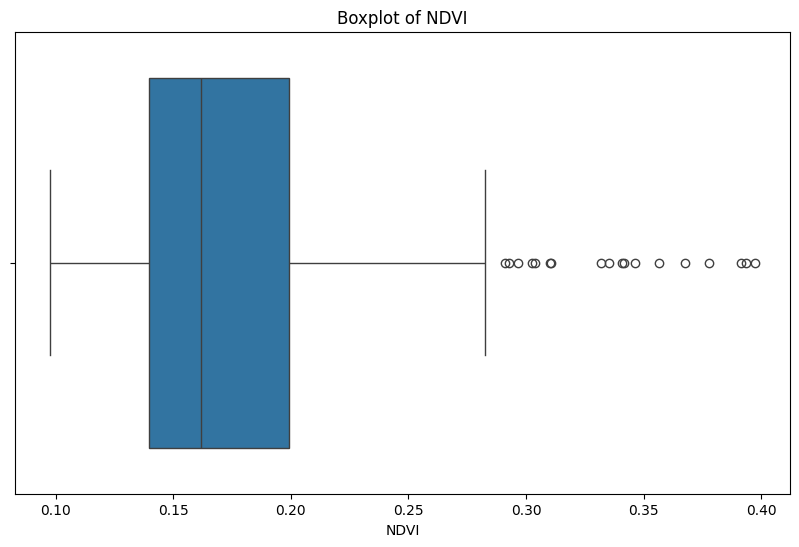

In [116]:
# prompt: Check for outlier using boxplot

import matplotlib.pyplot as plt
import seaborn as sns

# Assuming you want to check for outliers in a specific column, replace 'column_name'
# with the actual column name from your DataFrame.

plt.figure(figsize=(10, 6))
sns.boxplot(x=df['NDVI'])
plt.title('Boxplot of NDVI')
plt.xlabel('NDVI')

plt.show()

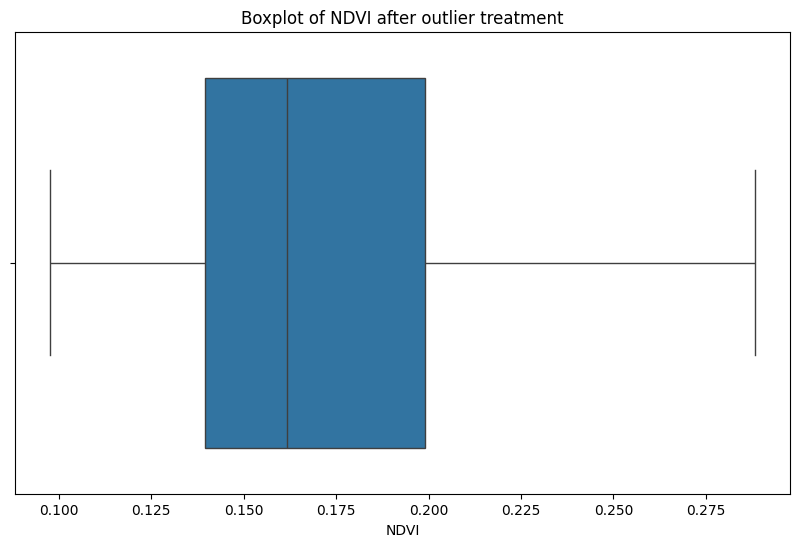

In [117]:
# prompt: Treat outlier using IQR

import matplotlib.pyplot as plt
Q1 = df['NDVI'].quantile(0.25)
Q3 = df['NDVI'].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Replace outliers with the nearest bound
df['NDVI'] = df['NDVI'].apply(lambda x: upper_bound if x > upper_bound else (lower_bound if x < lower_bound else x))

# Verify the change
plt.figure(figsize=(10, 6))
sns.boxplot(x=df['NDVI'])
plt.title('Boxplot of NDVI after outlier treatment')
plt.xlabel('NDVI')

plt.show()


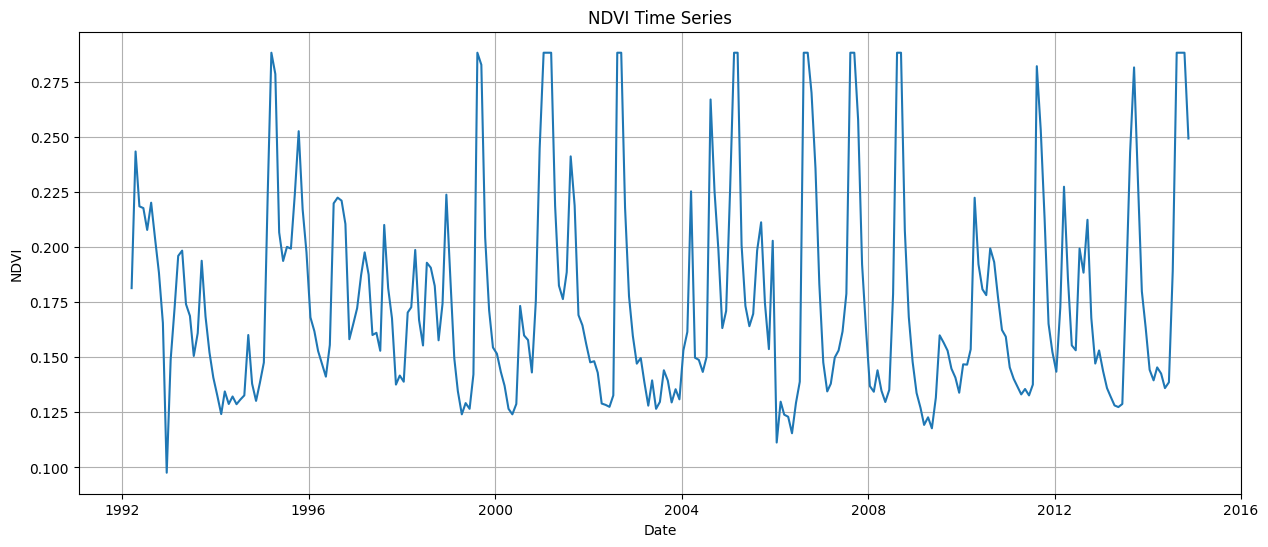

In [118]:
# prompt: Time series visualization

import matplotlib.pyplot as plt

# Assuming 'date' is the column containing your date/time information
# and 'NDVI' is the column you want to visualize.

plt.figure(figsize=(15, 6))
plt.plot(df['date'], df['NDVI']) # Changed 'Date' to 'date'
plt.xlabel('Date')
plt.ylabel('NDVI')
plt.title('NDVI Time Series')
plt.grid(True)
plt.show()

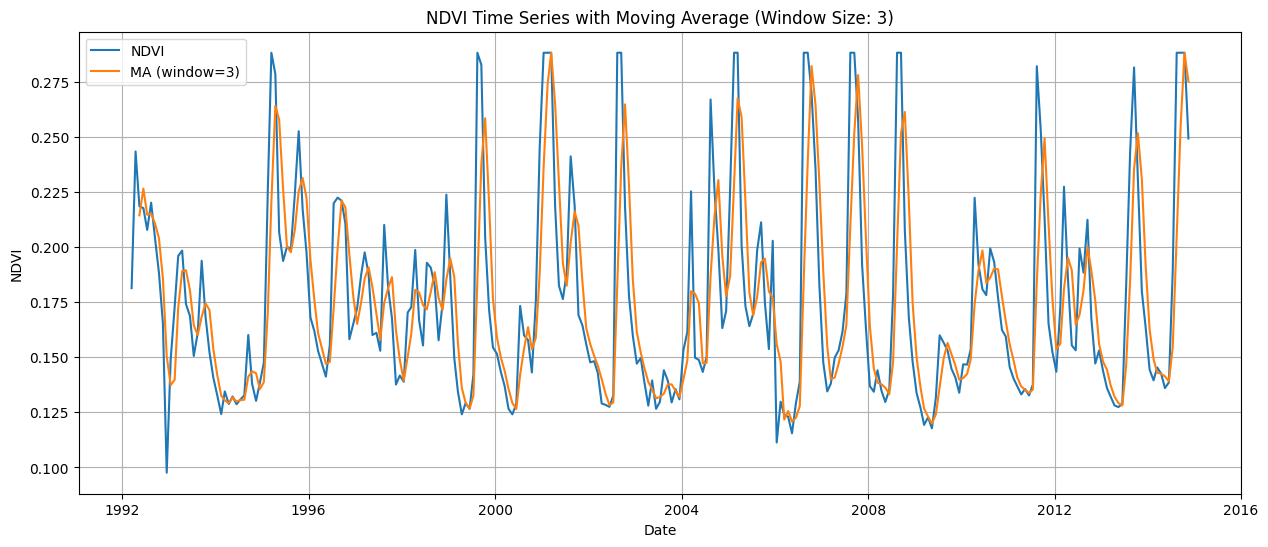

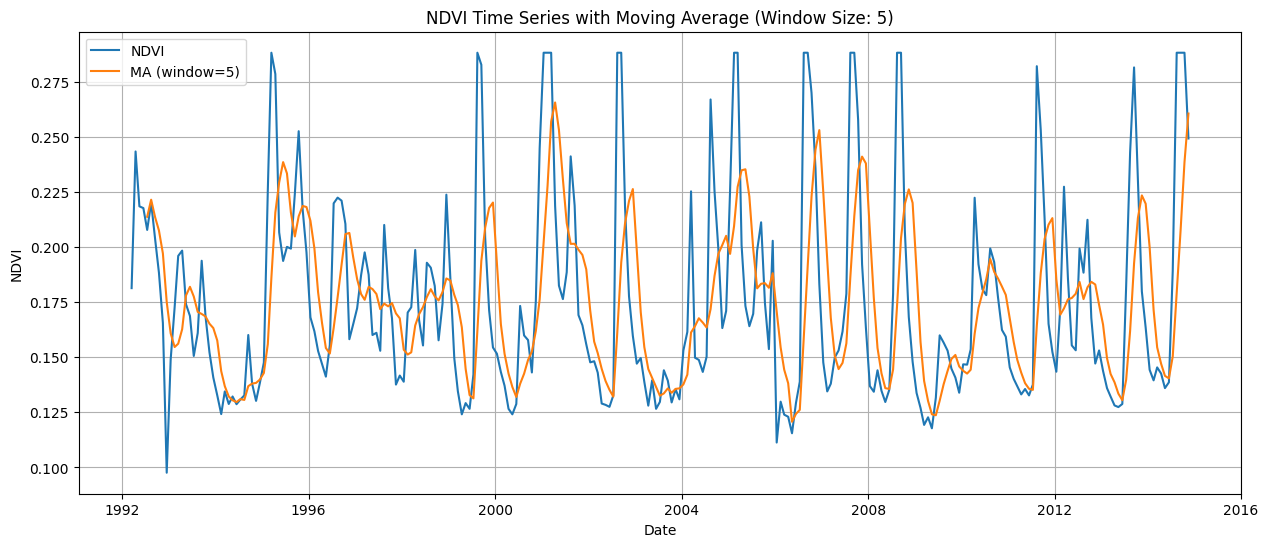

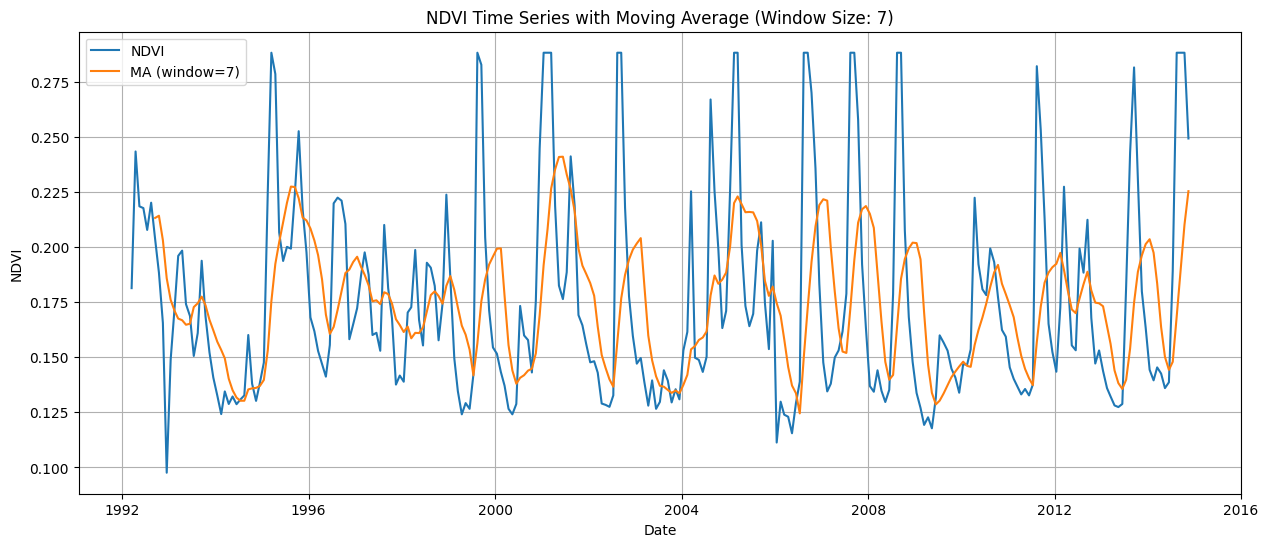

In [119]:
# prompt:  Just implement moving average method and add a column with ma
# optimize ma window size

import matplotlib.pyplot as plt
# Calculate moving average with different window sizes and evaluate the results
def calculate_moving_average(df, window_size):
  df['MA'] = df['NDVI'].rolling(window=window_size).mean()
  return df

# Test different window sizes for moving average
window_sizes_to_test = [3, 5, 7,]

for window_size in window_sizes_to_test:
  df_with_ma = calculate_moving_average(df.copy(), window_size)

  # You can add evaluation metrics here to choose the best window size
  # For example, calculate RMSE or MAE between the NDVI and MA values.

  # Example of visualization to help choose the window size
  plt.figure(figsize=(15, 6))
  plt.plot(df_with_ma['date'], df_with_ma['NDVI'], label='NDVI')
  plt.plot(df_with_ma['date'], df_with_ma['MA'], label=f'MA (window={window_size})')
  plt.xlabel('Date')
  plt.ylabel('NDVI')
  plt.title(f'NDVI Time Series with Moving Average (Window Size: {window_size})')
  plt.legend()
  plt.grid(True)
  plt.show()



# Choose the best window size based on the evaluation metrics or visualization
# and apply it to the original dataframe.
best_window_size = 3  # Replace with the optimal window size
df = calculate_moving_average(df, best_window_size)














In [120]:
df.head()


,date,NDVI,MA
0,1992-03-15,0.181375,NaN
1,1992-04-15,0.243400,NaN
2,1992-05-15,0.218500,0.214425
3,1992-06-15,0.217700,0.226533
4,1992-07-15,0.207800,0.214667


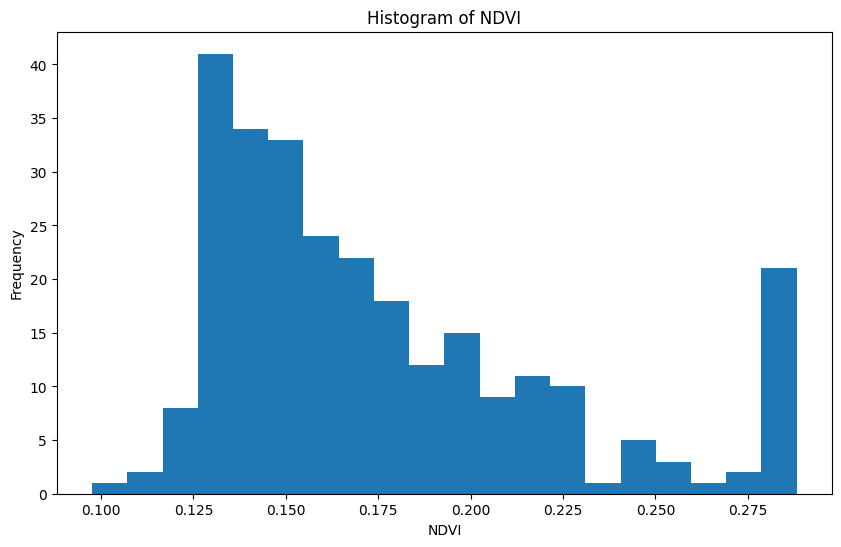

In [121]:
# prompt: histograph plot for the dataset

import matplotlib.pyplot as plt
# Assuming 'NDVI' is the column you want to plot a histogram for.
plt.figure(figsize=(10, 6))
plt.hist(df['NDVI'], bins=20)  # Adjust the number of bins as needed
plt.xlabel('NDVI')
plt.ylabel('Frequency')
plt.title('Histogram of NDVI')
plt.show()


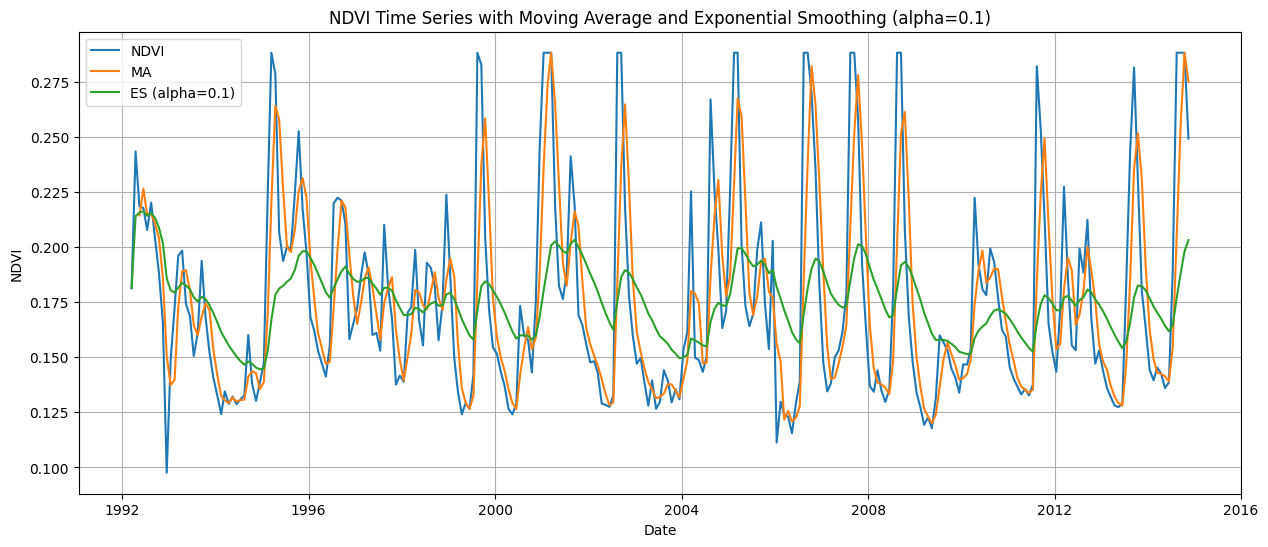

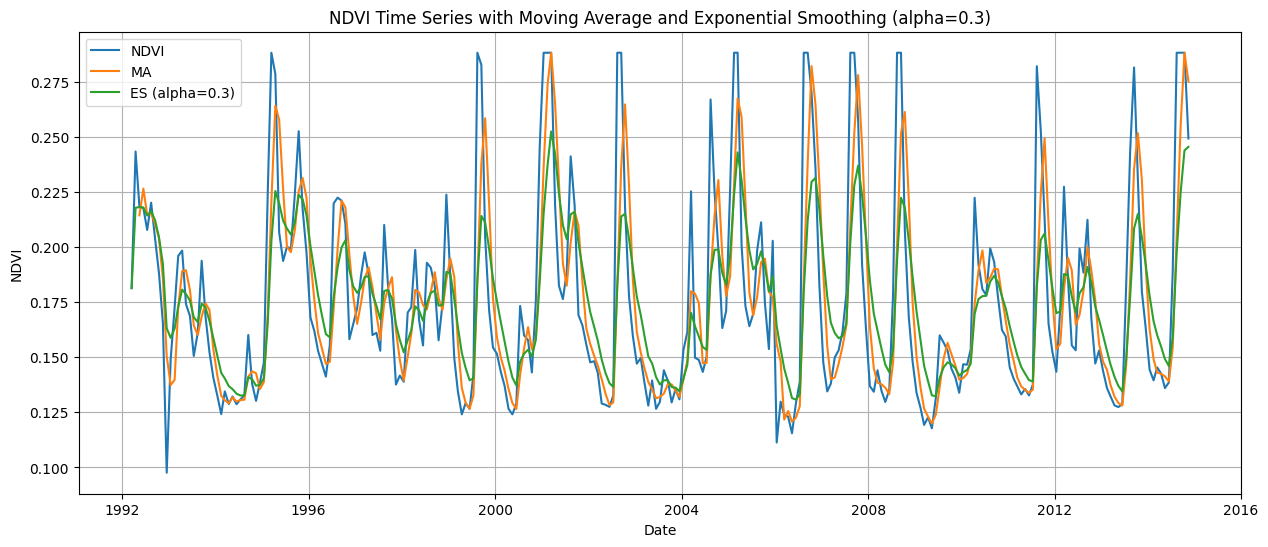

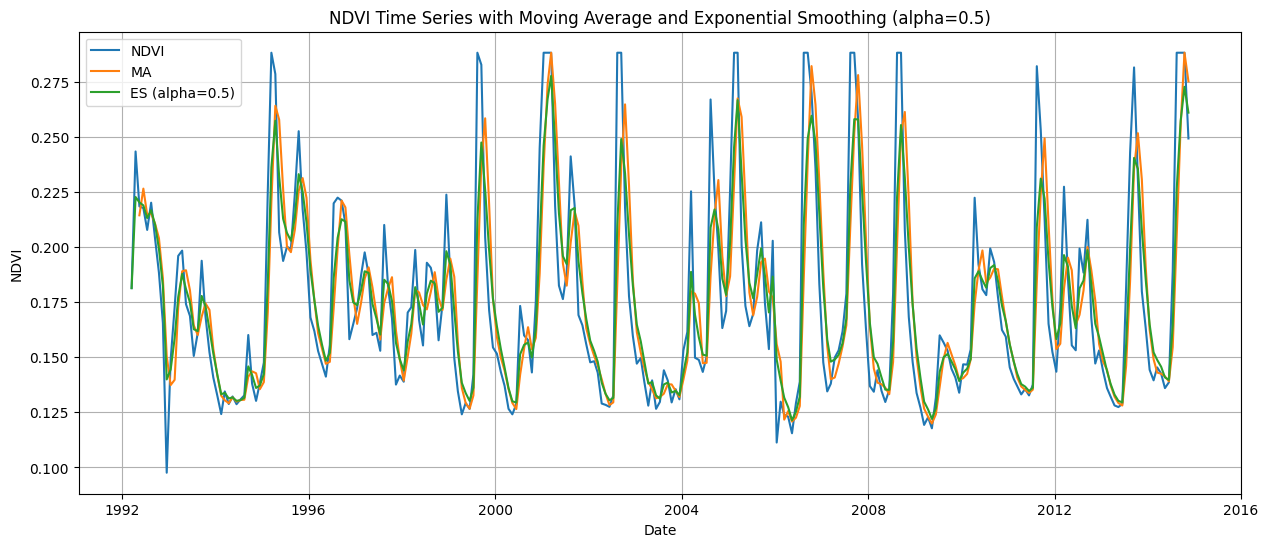

In [122]:
# prompt: Implement exponential smoothing method and add a column with exponential smoothing and use three different alpha value and also keep ma values

import matplotlib.pyplot as plt
def exponential_smoothing(df, alpha):
  """Applies exponential smoothing to a DataFrame column."""
  df['ES'] = df['NDVI'].ewm(alpha=alpha).mean()
  return df

# Apply exponential smoothing with different alpha values
alpha_values = [0.1, 0.3, 0.5]

for alpha in alpha_values:
  df = exponential_smoothing(df.copy(), alpha)
  plt.figure(figsize=(15, 6))
  plt.plot(df['date'], df['NDVI'], label='NDVI')
  plt.plot(df['date'], df['MA'], label='MA')
  plt.plot(df['date'], df['ES'], label=f'ES (alpha={alpha})')
  plt.xlabel('Date')
  plt.ylabel('NDVI')
  plt.title(f'NDVI Time Series with Moving Average and Exponential Smoothing (alpha={alpha})')
  plt.legend()
  plt.grid(True)
  plt.show()

# Keep the MA and ES columns from the last iteration with alpha = 0.5
# You might want to choose the best alpha based on your evaluation metrics
# and keep the corresponding columns.
df = exponential_smoothing(df, 0.5)


In [123]:
from sklearn.metrics import mean_squared_error, mean_absolute_error
import numpy as np

def calculate_rmse_mse_mae(df, column_name):
  """Calculates RMSE, MSE, and MAE for a given column."""
  # Drop rows with NaN values in either 'NDVI' or the specified column
  df = df.dropna(subset=['NDVI', column_name])
  rmse = np.sqrt(mean_squared_error(df['NDVI'], df[column_name]))
  mse = mean_squared_error(df['NDVI'], df[column_name])
  mae = mean_absolute_error(df['NDVI'], df[column_name])
  return rmse, mse, mae


alpha_values = [0.2, 0.3, 0.5]

for alpha in alpha_values:
  df_temp = df.copy()
  df_temp = exponential_smoothing(df_temp, alpha)

  rmse_ma, mse_ma, mae_ma = calculate_rmse_mse_mae(df_temp, 'MA')
  rmse_es, mse_es, mae_es = calculate_rmse_mse_mae(df_temp, 'ES')


  print(f"For alpha = {alpha}:")
  print(f"MA - RMSE: {rmse_ma:.4f}, MSE: {mse_ma:.4f}, MAE: {mae_ma:.4f}")
  print(f"ES - RMSE: {rmse_es:.4f}, MSE: {mse_es:.4f}, MAE: {mae_es:.4f}")
  print("-" * 20)

For alpha = 0.2:
MA - RMSE: 0.0282, MSE: 0.0008, MAE: 0.0195
ES - RMSE: 0.0360, MSE: 0.0013, MAE: 0.0267
--------------------
For alpha = 0.3:
MA - RMSE: 0.0282, MSE: 0.0008, MAE: 0.0195
ES - RMSE: 0.0305, MSE: 0.0009, MAE: 0.0222
--------------------
For alpha = 0.5:
MA - RMSE: 0.0282, MSE: 0.0008, MAE: 0.0195
ES - RMSE: 0.0203, MSE: 0.0004, MAE: 0.0144
--------------------


**ARIMA**

RMSE: 0.04772880879406747


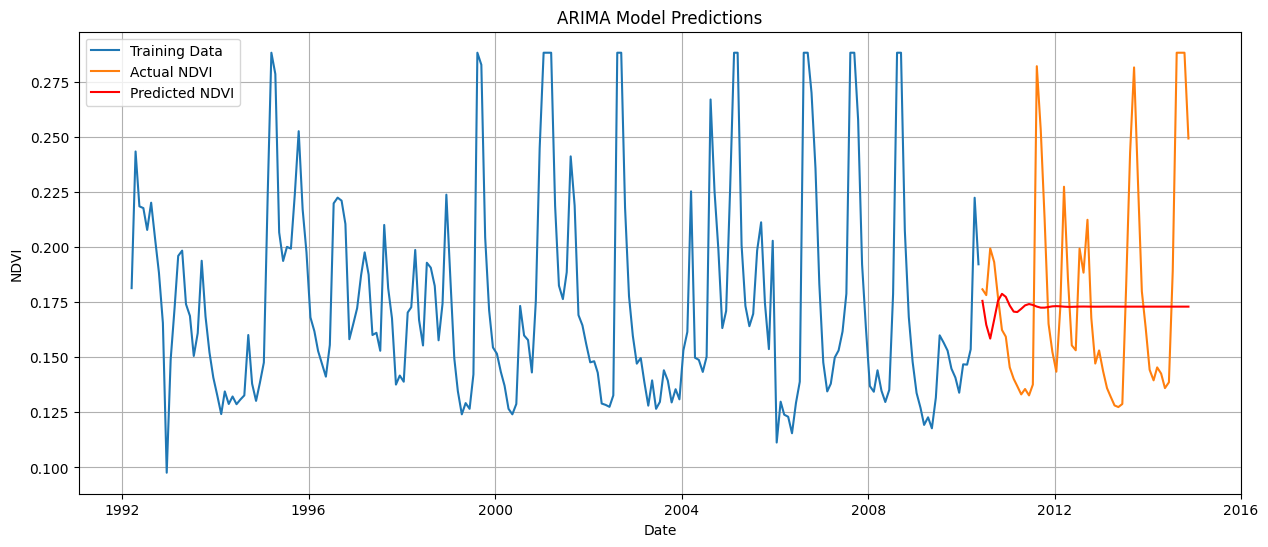

In [124]:
# prompt: PLOT TIME SERIES

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error
import warnings
warnings.filterwarnings("ignore")

# Assuming 'date' is the index or a column containing the date information
# and 'NDVI' is the column you want to model

# Convert 'date' to datetime if it's not already in datetime format
df['date'] = pd.to_datetime(df['date'])

# Set 'date' as the index
df.set_index('date', inplace=True)

# Split data into training and testing sets (e.g., 80% training, 20% testing)
train_data = df[:-int(len(df) * 0.2)]  # Adjust the split ratio as needed
test_data = df[-int(len(df) * 0.2):]


# Fit ARIMA model to training data (adjust (p, d, q) order as needed)
model = ARIMA(train_data['NDVI'], order=(5, 1, 0))  # Example: ARIMA(5, 1, 0)
model_fit = model.fit()


# Make predictions on the test data
predictions = model_fit.predict(start=len(train_data), end=len(df)-1)

# Evaluate the model (e.g., using RMSE)
rmse = np.sqrt(mean_squared_error(test_data['NDVI'], predictions))
print(f'RMSE: {rmse}')

# Plot the actual vs. predicted values
plt.figure(figsize=(15, 6))
plt.plot(train_data.index, train_data['NDVI'], label='Training Data')
plt.plot(test_data.index, test_data['NDVI'], label='Actual NDVI')
plt.plot(test_data.index, predictions, label='Predicted NDVI', color='red')
plt.xlabel('Date')
plt.ylabel('NDVI')
plt.title('ARIMA Model Predictions')
plt.legend()
plt.grid(True)
plt.show()


In [ ]:
# prompt: Perform ADF test

from statsmodels.tsa.stattools import adfuller

# Perform ADF test on the 'NDVI' column
result = adfuller(df['NDVI'])

# Print the ADF test results
print('ADF Statistic:', result[0])
print('p-value:', result[1])
print('Critical Values:', result[4])

# Interpret the results
if result[1] <= 0.05:
    print('The time series is likely stationary.')
else:
    print('The time series is likely non-stationary.')


ADF Statistic: -5.146901990526906
p-value: 1.1273660197989219e-05
Critical Values: {'1%': -3.4557539868570775, '5%': -2.8727214497041422, '10%': -2.572728476331361}
The time series is likely stationary.


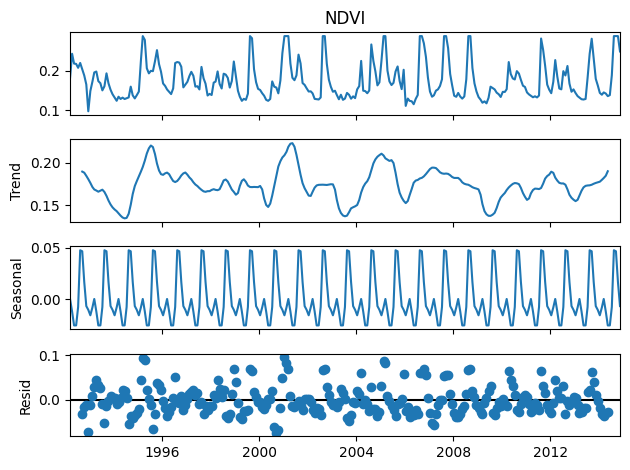

Trend is present in the data.
Seasonality is present in the data.


In [127]:
# prompt: Check for seasonality and trend

import matplotlib.pyplot as plt
import statsmodels.api as sm

# Assuming your data has a monthly frequency
# Replace 12 with the appropriate period for your data
period = 12

# Decompose the time series into trend, seasonality, and residual components
decomposition = sm.tsa.seasonal_decompose(df['NDVI'], model='additive', period=period)

# Plot the decomposition components
fig = decomposition.plot()
plt.show()

# Check for trend and seasonality
if decomposition.trend is not None:
    print("Trend is present in the data.")
else:
    print("Trend is not present in the data.")

if decomposition.seasonal is not None:
    print("Seasonality is present in the data.")
else:
    print("Seasonality is not present in the data.")

<Figure size 1200x500 with 0 Axes>

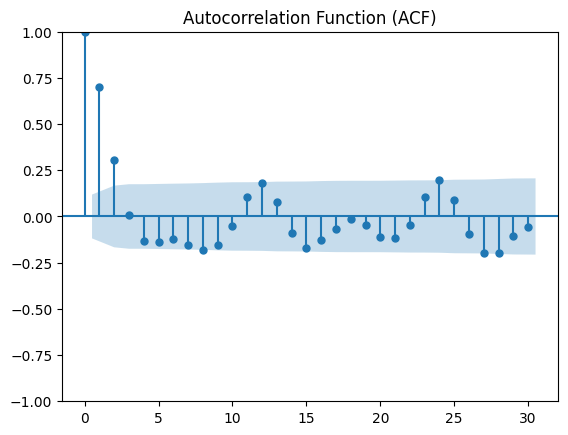

<Figure size 1200x500 with 0 Axes>

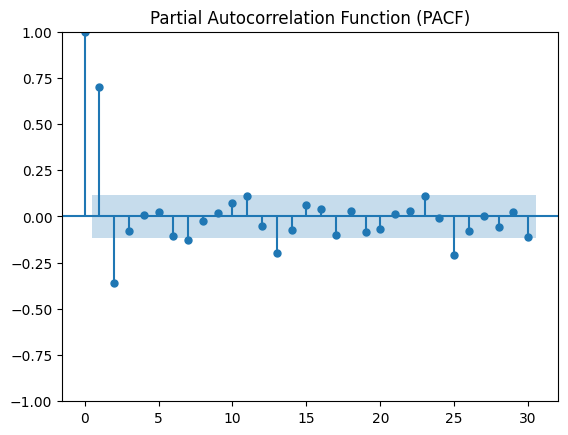

In [ ]:
# prompt: Plot ACF and PACF

import matplotlib.pyplot as plt
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

# Plot ACF
plt.figure(figsize=(12, 5))
plot_acf(df['NDVI'], lags=30)  # Adjust the number of lags as needed
plt.title('Autocorrelation Function (ACF)')
plt.show()

# Plot PACF
plt.figure(figsize=(12, 5))
plot_pacf(df['NDVI'], lags=30)  # Adjust the number of lags as needed
plt.title('Partial Autocorrelation Function (PACF)')
plt.show()


Performing stepwise search to minimize aic
 ARIMA(2,0,2)(0,0,0)[0]             : AIC=-830.396, Time=0.29 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=-124.501, Time=0.04 sec
 ARIMA(1,0,0)(0,0,0)[0]             : AIC=-829.838, Time=0.02 sec
 ARIMA(0,0,1)(0,0,0)[0]             : AIC=-375.461, Time=0.06 sec
 ARIMA(1,0,2)(0,0,0)[0]             : AIC=-835.556, Time=0.20 sec
 ARIMA(0,0,2)(0,0,0)[0]             : AIC=-535.857, Time=0.16 sec
 ARIMA(1,0,1)(0,0,0)[0]             : AIC=-834.352, Time=0.07 sec
 ARIMA(1,0,3)(0,0,0)[0]             : AIC=-861.177, Time=0.37 sec
 ARIMA(0,0,3)(0,0,0)[0]             : AIC=-642.064, Time=0.18 sec
 ARIMA(2,0,3)(0,0,0)[0]             : AIC=-867.728, Time=0.41 sec
 ARIMA(3,0,3)(0,0,0)[0]             : AIC=-865.311, Time=0.56 sec
 ARIMA(2,0,4)(0,0,0)[0]             : AIC=-855.091, Time=0.82 sec
 ARIMA(1,0,4)(0,0,0)[0]             : AIC=-836.763, Time=0.72 sec
 ARIMA(3,0,2)(0,0,0)[0]             : AIC=-829.001, Time=0.41 sec
 ARIMA(3,0,4)(0,0,0)[0]          

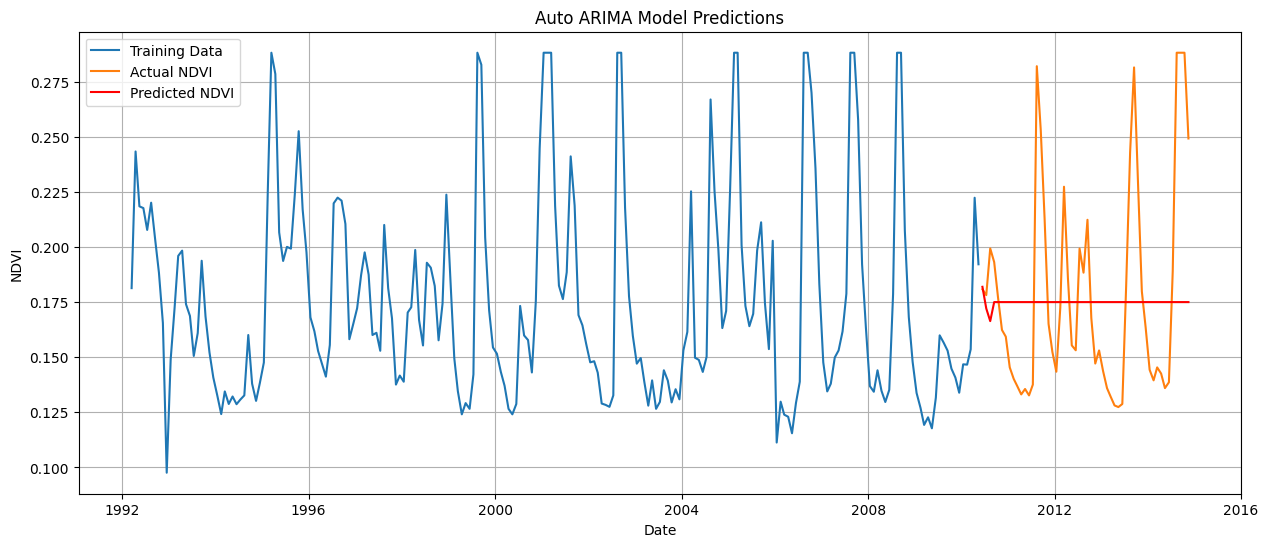

In [128]:
# prompt: Auto Arima

import matplotlib.pyplot as plt
import numpy as np
from pmdarima import auto_arima

# Assuming 'NDVI' is your time series data and 'date' is the index
# Split data into training and testing sets
train_data = df[:-int(len(df) * 0.2)]
test_data = df[-int(len(df) * 0.2):]

# Perform Auto ARIMA
model = auto_arima(train_data['NDVI'],
                  seasonal=False,  # Set to True if you have seasonality
                  trace=True,
                  error_action='ignore',
                  suppress_warnings=True)

# Print the best ARIMA order found by auto_arima
print(model.order)

# Fit the model to the training data
model.fit(train_data['NDVI'])

# Make predictions on the test data
predictions = model.predict(n_periods=len(test_data))

# Evaluate the model
rmse = np.sqrt(mean_squared_error(test_data['NDVI'], predictions))
print(f"RMSE: {rmse}")

# Plot the actual vs. predicted values
plt.figure(figsize=(15, 6))
plt.plot(train_data.index, train_data['NDVI'], label='Training Data')
plt.plot(test_data.index, test_data['NDVI'], label='Actual NDVI')
plt.plot(test_data.index, predictions, label='Predicted NDVI', color='red')
plt.xlabel('Date')
plt.ylabel('NDVI')
plt.title('Auto ARIMA Model Predictions')
plt.legend()
plt.grid(True)
plt.show()


ARIMA Order: (0, 0, 3), Seasonal Order: (2, 1, 2, 4), AIC: -866.1979770466942
ARIMA Order: (0, 0, 3), Seasonal Order: (2, 1, 2, 10), AIC: -813.1461298340005
ARIMA Order: (0, 0, 3), Seasonal Order: (2, 1, 2, 24), AIC: -774.8772700894797
ARIMA Order: (0, 0, 3), Seasonal Order: (2, 1, 2, 30), AIC: -723.8175174115856
RMSE: 0.047350278160784104


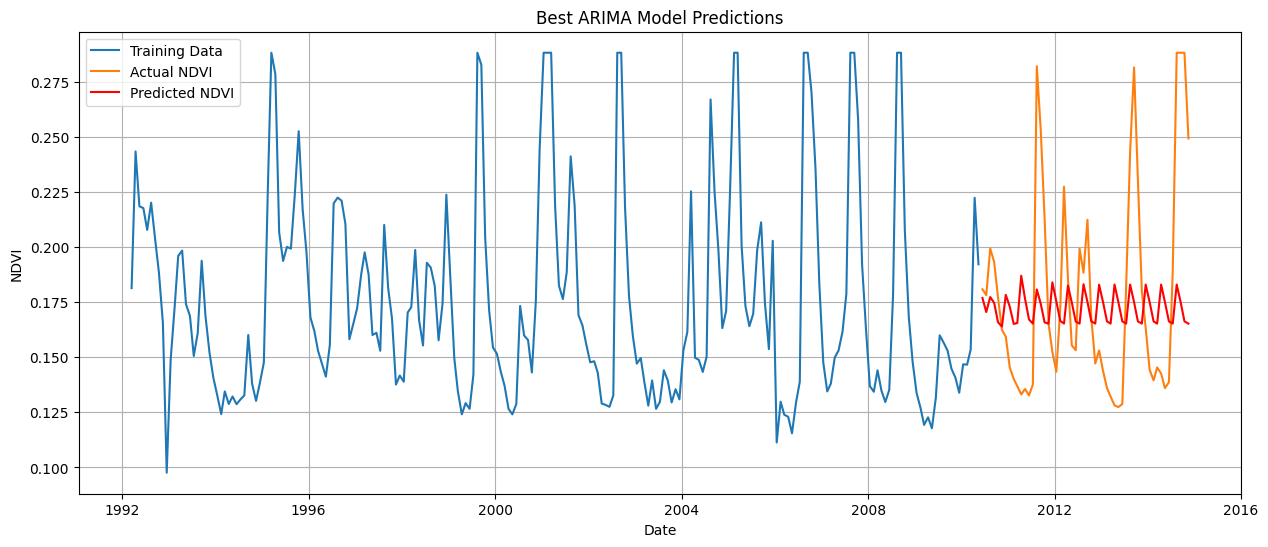

In [129]:
# prompt: now by taking arima as (0,0,3) and run arima with different seasonality of (2,1,2); 4,10,24,30 and also show aic

import matplotlib.pyplot as plt
import numpy as np
# Define ARIMA orders to test
arima_orders = [(0, 0, 3)]
seasonal_orders = [(2, 1, 2, 4), (2, 1, 2, 10), (2, 1, 2, 24), (2, 1, 2, 30)]

results = []

for arima_order in arima_orders:
    for seasonal_order in seasonal_orders:
        try:
            # Fit ARIMA model with the specified orders
            model = sm.tsa.statespace.SARIMAX(train_data['NDVI'], order=arima_order, seasonal_order=seasonal_order)
            model_fit = model.fit()

            # Store the results
            results.append({
                'arima_order': arima_order,
                'seasonal_order': seasonal_order,
                'aic': model_fit.aic,
                'model': model_fit
            })

        except Exception as e:
            print(f"Error fitting model with order {arima_order} and seasonal order {seasonal_order}: {e}")


# Print the results, including AIC
for result in results:
  print(f"ARIMA Order: {result['arima_order']}, Seasonal Order: {result['seasonal_order']}, AIC: {result['aic']}")


# You can further analyze the results and choose the model with the lowest AIC or
# the best performance metrics.
# For example, you can select the model with the lowest AIC:
best_model_index = min(range(len(results)), key=lambda i: results[i]['aic'])
best_model = results[best_model_index]['model']

# Make predictions using the best model
predictions = best_model.predict(start=len(train_data), end=len(df) - 1)

# Evaluate the model
rmse = np.sqrt(mean_squared_error(test_data['NDVI'], predictions))
print(f'RMSE: {rmse}')

# Plot the actual vs. predicted values
plt.figure(figsize=(15, 6))
plt.plot(train_data.index, train_data['NDVI'], label='Training Data')
plt.plot(test_data.index, test_data['NDVI'], label='Actual NDVI')
plt.plot(test_data.index, predictions, label='Predicted NDVI', color='red')
plt.xlabel('Date')
plt.ylabel('NDVI')
plt.title('Best ARIMA Model Predictions')
plt.legend()
plt.grid(True)
plt.show()


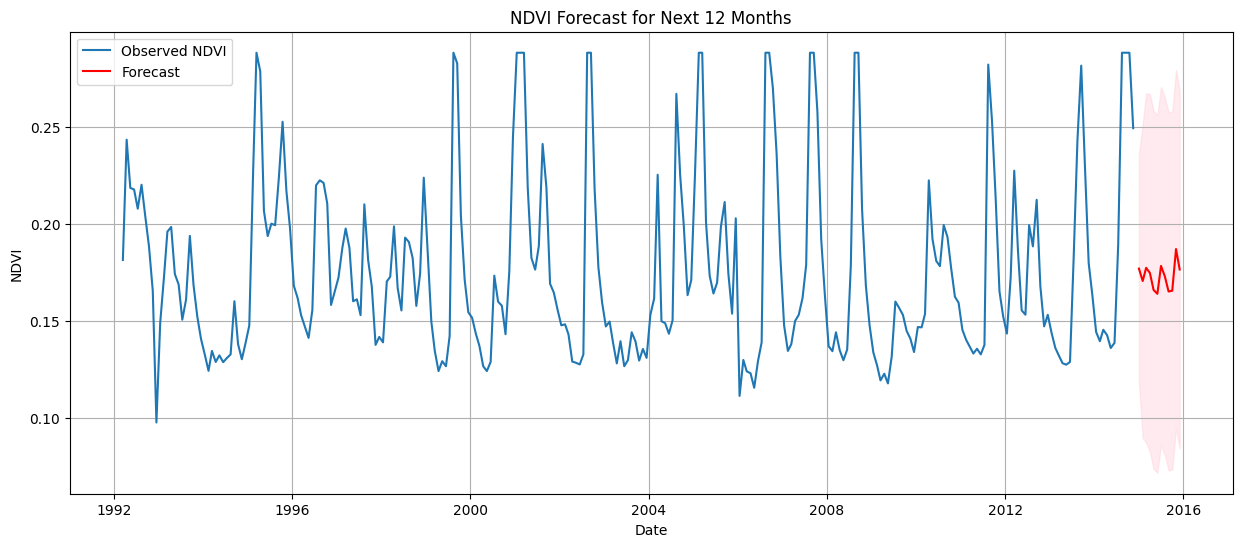

In [133]:
# prompt: forecast for next 12 months using arima

import pandas as pd
import matplotlib.pyplot as plt
# Assuming you have your best ARIMA model (best_model) from the previous code

# Forecast for the next 12 months
forecast_steps = 12
forecast = best_model.get_forecast(steps=forecast_steps)

# Get the predicted mean values
forecast_mean = forecast.predicted_mean

# Get the confidence intervals
forecast_conf_int = forecast.conf_int()

# Create a date range for the forecast period
last_date = df.index[-1]
forecast_dates = pd.date_range(start=last_date + pd.DateOffset(months=1), periods=forecast_steps, freq='MS')  # 'MS' for start of month

# Plot the forecast
plt.figure(figsize=(15, 6))
plt.plot(df.index, df['NDVI'], label='Observed NDVI')
plt.plot(forecast_dates, forecast_mean, label='Forecast', color='red')
plt.fill_between(forecast_dates, forecast_conf_int.iloc[:, 0], forecast_conf_int.iloc[:, 1], color='pink', alpha=0.3)
plt.xlabel('Date')
plt.ylabel('NDVI')
plt.title('NDVI Forecast for Next 12 Months')
plt.legend()
plt.grid(True)
plt.show()







In [132]:
# Print the forecast values
print("Forecast for the next 12 months:")
for i in range(forecast_steps):
    print(f"Month {i+1}: {forecast_mean.iloc[i]:.4f}") # Use iloc to access values by position

Forecast for the next 12 months:
Month 1: 0.1769
Month 2: 0.1705
Month 3: 0.1773
Month 4: 0.1747
Month 5: 0.1659
Month 6: 0.1639
Month 7: 0.1783
Month 8: 0.1730
Month 9: 0.1651
Month 10: 0.1655
Month 11: 0.1870
Month 12: 0.1765


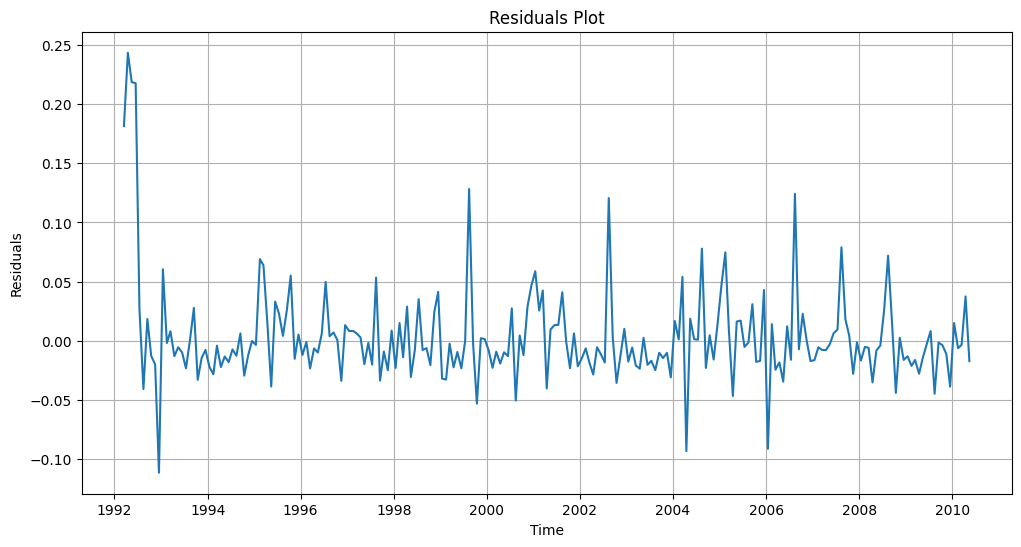

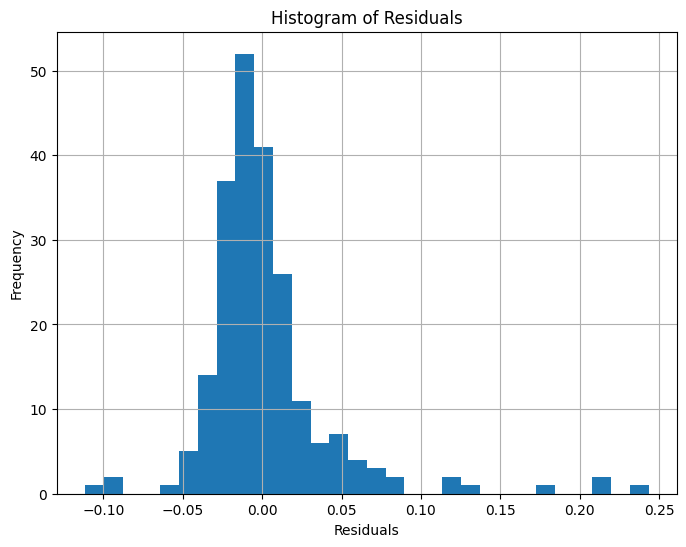

<Figure size 1200x600 with 0 Axes>

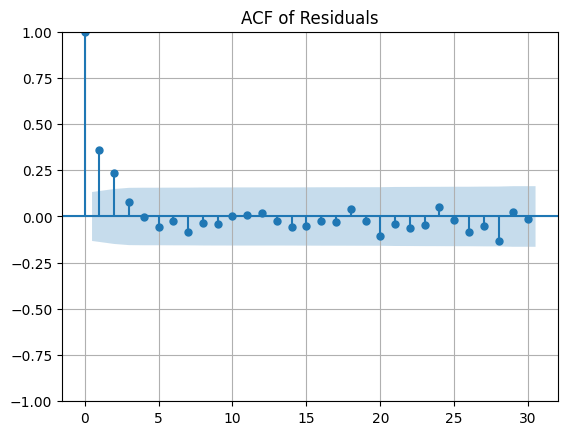

In [135]:
# prompt: Residuals plot

import matplotlib.pyplot as plt
# Assuming you have your best ARIMA model (best_model) from the previous code

# Obtain the residuals from the fitted model
residuals = best_model.resid

# Plot the residuals
plt.figure(figsize=(12, 6))
plt.plot(residuals)
plt.title('Residuals Plot')
plt.xlabel('Time')
plt.ylabel('Residuals')
plt.grid(True)
plt.show()

# Plot the histogram of residuals
plt.figure(figsize=(8, 6))
plt.hist(residuals, bins=30)
plt.title('Histogram of Residuals')
plt.xlabel('Residuals')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

# Plot the autocorrelation function (ACF) of the residuals
plt.figure(figsize=(12, 6))
sm.graphics.tsa.plot_acf(residuals, lags=30)
plt.title('ACF of Residuals')
plt.grid(True)
plt.show()



<Figure size 1200x600 with 0 Axes>

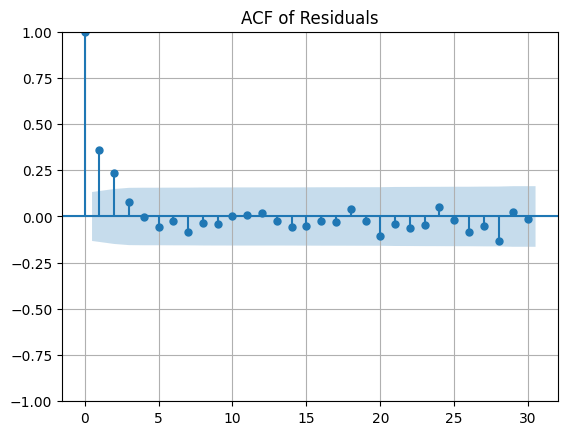

In [136]:
# prompt: ACF of residuals

import matplotlib.pyplot as plt
# Assuming you have your best ARIMA model (best_model) from the previous code

# Obtain the residuals from the fitted model
residuals = best_model.resid

# Plot the autocorrelation function (ACF) of the residuals
plt.figure(figsize=(12, 6))
sm.graphics.tsa.plot_acf(residuals, lags=30)
plt.title('ACF of Residuals')
plt.grid(True)
plt.show()


In [138]:
# prompt: do a LJUNG Test for model diagnostic

from statsmodels.stats.diagnostic import acorr_ljungbox

# Assuming you have your best ARIMA model (best_model) from the previous code
# and residuals are calculated as: residuals = best_model.resid

# Perform the Ljung-Box test
lb_test = acorr_ljungbox(residuals, lags=[10], return_df=True)  # Adjust lags as needed

# Print the results
print(lb_test)

# Interpret the results
# If the p-value is less than your significance level (e.g., 0.05),
# you reject the null hypothesis that the residuals are uncorrelated.
# This indicates that there is evidence of autocorrelation in the residuals,
# and your model might not be capturing all the information in the data.


      lb_stat  lb_pvalue
10  45.654353   0.000002
